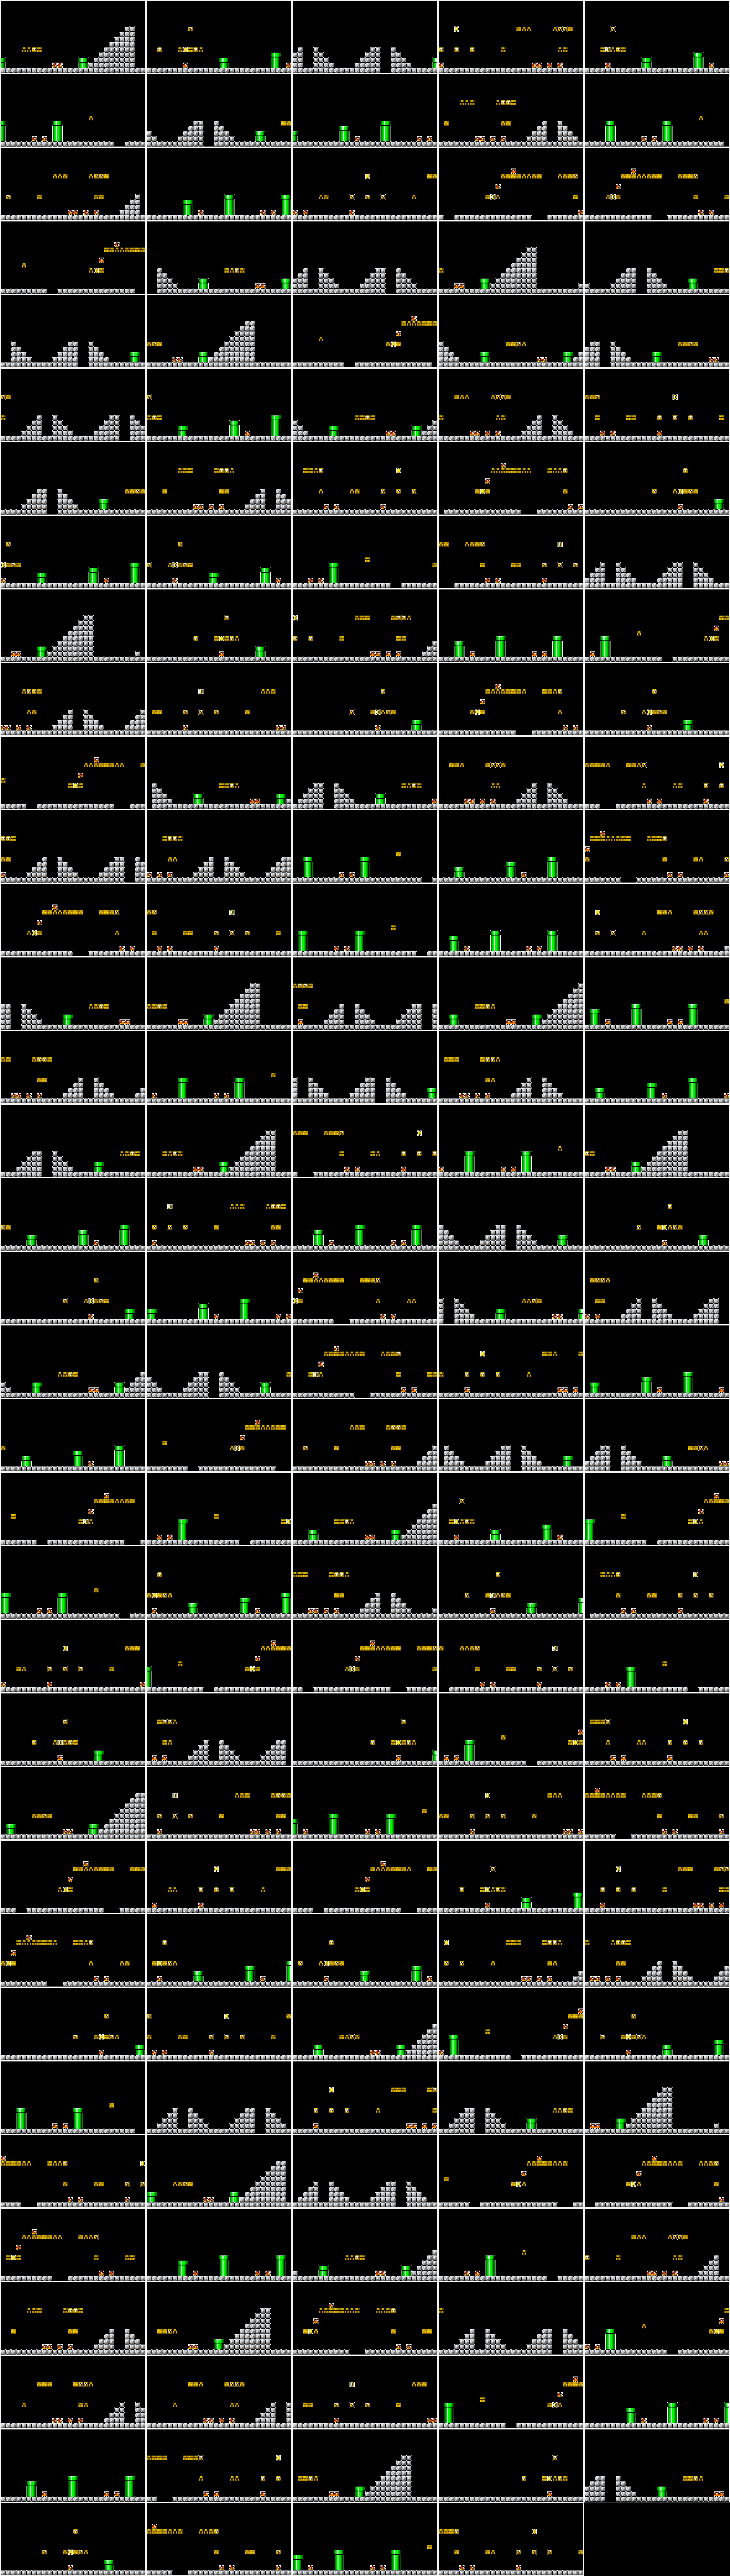

In [7]:
import math
import matplotlib.pyplot as plt
import torch
import numpy as np
from PIL import Image
from gan.game.env import Game
from gan.game.mario import Mario
from gan.game.zelda import Zelda
from gan.game.boulderdash import Boulderdash
from gan.config import ZeldaConfig,MarioConfig,BoulderdashConfig
from gan.level_visualizer import GVGAILevelVisualizer
from gan.level_visualizer import MarioLevelVisualizer
from torchvision.utils import make_grid

# game = Boulderdash()
# config = BoulderdashConfig()
# config.set_env(game)
# visualizer = GVGAILevelVisualizer(game)

game = Mario()
config = MarioConfig()
config.set_env(game)
visualizer = MarioLevelVisualizer(game,config.data_path)
lvl_strs = visualizer.game.get_original_levels(
    f'/root/mnt/pcg/GVGAI-GAN/gan/data/level/{config.env_fullname}/originals')

p_level_img = [
    torch.Tensor(
        np.array(visualizer.draw_level(lvl)).transpose(
            2, 0, 1
        )
        / 255.0
    )
    for lvl in lvl_strs
]
grid_level_img = make_grid(
    p_level_img, nrow=5, padding=0)

img = Image.fromarray((grid_level_img.transpose(
    0, 2).transpose(0, 1).numpy() * 255).astype(np.uint8))
img.show()
